In [1]:
import numpy as np


from pylab import rcParams
rcParams['figure.figsize'] = 12,9

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
import plotly.express as px


init_notebook_mode(connected=True)



import scipy.stats as sts
%matplotlib inline
import statistics

In [2]:
# Функция округления
def toFixed(numObj, digits=0):
    return f"{numObj:.{digits}f}"

**1.Загрузить файл hr.csv.**

In [3]:
hr = pd.read_csv('HR.csv')
hr['count_people'] = 1

In [4]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,count_people
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


**2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).**

In [5]:
clear = hr.last_evaluation
value = {}

value['Mediana'] = statistics.median(clear)

try:
    value['Mode'] = statistics.mode(clear)
except:
    value['Mode'] = 'Отсутствует'

value['Mean'] = statistics.mean(clear)

value['pstdev'] = statistics.pstdev(clear)

value['pvariance'] = statistics.pvariance(clear)

value['max'] = clear.max()
value['min'] = clear.min()

value['max-min'] = clear.max() - clear.min()

for res in value.items():
    print(f'{res[0]} : {res[1]}')
    

Mediana : 0.72
Mode : 0.55
Mean : 0.7161017401160077
pstdev : 0.1711634045107436
pvariance : 0.029296911043708445
max : 1.0
min : 0.36
max-min : 0.64


**3.Рассчитать и визуализировать корреляционную матрицу для переменных.**


In [6]:
hr_matrix = hr.drop(['number_project','sales','salary', 'count_people'],axis='columns')
hr_matrix_sns = hr_matrix.corr().round(2)
hr_matrix_sns

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.34,0.13,-0.01,0.01,-0.01
average_montly_hours,-0.02,0.34,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.00,0.07,0.04,-0.06,1.00


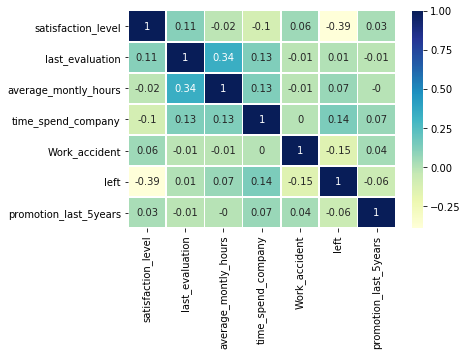

In [34]:
sns.heatmap(hr_matrix_sns, annot=True,linewidths=0.5, cmap="YlGnBu")


**4.Визуализировать несколько взаимосвязей между переменными.**


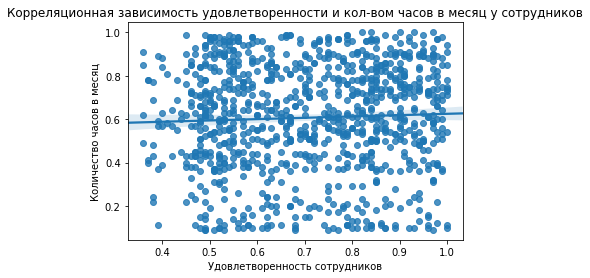

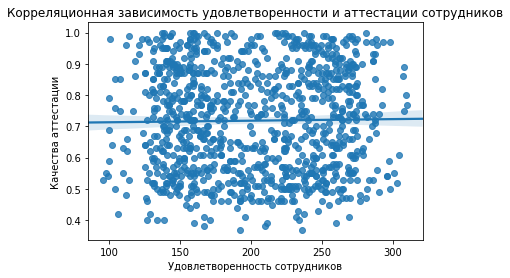

In [84]:

sns.regplot(x= hr.last_evaluation.sample(1000), y=hr.satisfaction_level.sample(1000),data=hr, fit_reg=True)
plt.xlabel('Удовлетворенность сотрудников')
plt.ylabel('Количество часов в месяц')
plt.title('Корреляционная зависимость удовлетворенности и кол-вом часов в месяц у сотрудников')
plt.grid(False)
plt.show()






sns.regplot(x= hr.average_montly_hours.sample(1000), y=hr.last_evaluation.sample(1000),data=hr, fit_reg=True)
plt.xlabel('Удовлетворенность сотрудников')
plt.ylabel('Качества аттестации')
plt.title('Корреляционная зависимость удовлетворенности и аттестации сотрудников')
plt.grid(False)
plt.show()

**5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.**


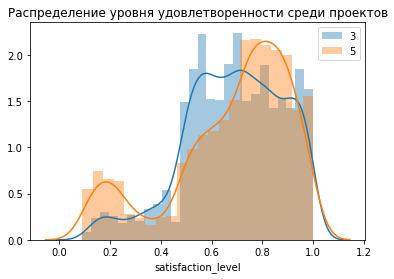

t-критерий: 1.680
p-value:0.093


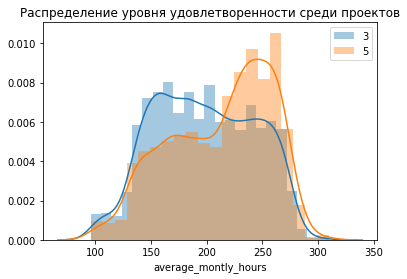

t-критерий: -13.122
p-value:0.000


In [10]:
data_tuple = (3,5,'satisfaction_level')

hr1 = hr.loc[hr['number_project']==data_tuple[0]][data_tuple[2]]
hr2 = hr.loc[hr['number_project']==data_tuple[1]][data_tuple[2]]

sns.distplot(hr1)
sns.distplot(hr2)
plt.title('Распределение уровня удовлетворенности среди проектов')
plt.legend([data_tuple[0],data_tuple[1]])
plt.show()

value = sts.ttest_ind(hr1, hr2)
print(f't-критерий: {value.statistic:.3f}')
print(f'p-value:{value.pvalue:.3f}')



data_tuple = (3,5,'average_montly_hours')

hr1 = hr.loc[hr['number_project']==data_tuple[0]][data_tuple[2]]
hr2 = hr.loc[hr['number_project']==data_tuple[1]][data_tuple[2]]

sns.distplot(hr1)
sns.distplot(hr2)
plt.title('Распределение уровня удовлетворенности среди проектов')
plt.legend([data_tuple[0],data_tuple[1]])
plt.show()

value = sts.ttest_ind(hr1, hr2)
print(f't-критерий: {value.statistic:.3f}')
print(f'p-value:{value.pvalue:.3f}')

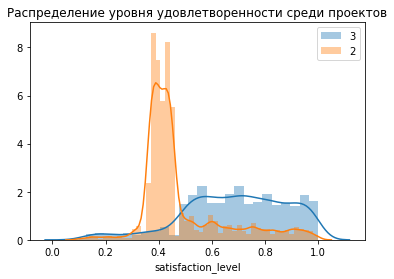

t-критерий: 44.367
p-value:0.000


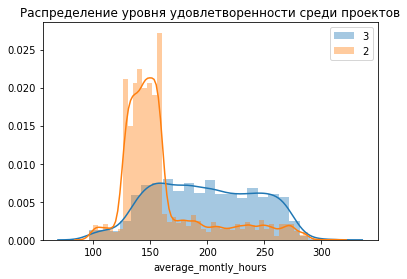

t-критерий: 33.848
p-value:0.000


In [11]:
data_tuple = (3,2,'satisfaction_level')

hr1 = hr.loc[hr['number_project']==data_tuple[0]][data_tuple[2]]
hr2 = hr.loc[hr['number_project']==data_tuple[1]][data_tuple[2]]

sns.distplot(hr1)
sns.distplot(hr2)
plt.title('Распределение уровня удовлетворенности среди проектов')
plt.legend([data_tuple[0],data_tuple[1]])
plt.show()

value = sts.ttest_ind(hr1, hr2)
print(f't-критерий: {value.statistic:.3f}')
print(f'p-value:{value.pvalue:.3f}')




data_tuple = (3,2,'average_montly_hours')

hr1 = hr.loc[hr['number_project']==data_tuple[0]][data_tuple[2]]
hr2 = hr.loc[hr['number_project']==data_tuple[1]][data_tuple[2]]

sns.distplot(hr1)
sns.distplot(hr2)
plt.title('Распределение уровня удовлетворенности среди проектов')
plt.legend([data_tuple[0],data_tuple[1]])
plt.show()

value = sts.ttest_ind(hr1, hr2)
print(f't-критерий: {value.statistic:.3f}')
print(f'p-value:{value.pvalue:.3f}')

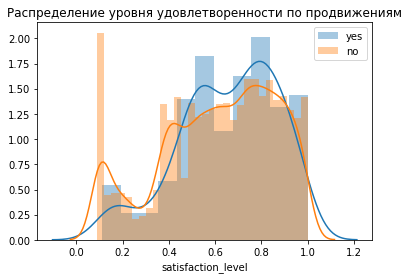

t-критерий: 3.137
p-value:0.002


In [12]:
data_tuple = ('yes','no','satisfaction_level')
hr1 = hr.loc[hr['promotion_last_5years']==1][data_tuple[2]]
hr2 = hr.loc[hr['promotion_last_5years']==0][data_tuple[2]]

sns.distplot(hr1)
sns.distplot(hr2)
plt.title('Распределение уровня удовлетворенности по продвижениям')
plt.legend([data_tuple[0],data_tuple[1]])
plt.show()
value = sts.ttest_ind(hr1, hr2)
print(f't-критерий: {value.statistic:.3f}')
print(f'p-value:{value.pvalue:.3f}')

**6.Рассчитать сколько работников работает в каждом департаменте.**


In [13]:
people_department = hr.filter(items=['sales','count_people']).groupby('sales').count()
people_department

,count_people
sales,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


In [14]:
trace0 = go.Bar(
    x=people_department.index,
    y=people_department.count_people,
    name='Sales'
)

  
data = [trace0]
layout = {'title': 'Statistics of department people'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

**7.Показать распределение сотрудников по зарплатам.**


In [15]:
people_salary = hr.filter(items=['salary','count_people']).groupby(by = 'salary').count()
people_salary

,count_people
salary,
high,1237
low,7316
medium,6446


In [16]:
trace0 = go.Bar(
    x=people_salary.index,
    y=people_salary.count_people,
    name='Sales'
)

  
data = [trace0]
layout = {'title': 'Statistics of salary'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

**8.Показать распределение сотрудников по зарплатам совместно с департаментами.**


In [17]:
people_salary_department = hr.filter(items=['sales','salary','count_people']).groupby(by = ['salary','sales']).count()
people_salary_department


people_salary_department_pivot = people_salary_department.pivot_table(
                        index='sales', 
                        columns='salary', 
                        values='count_people', 
                        aggfunc=sum).fillna(0).applymap(float)
people_salary_department_pivot


salary,high,low,medium
sales,,,
IT,83.0,609.0,535.0
RandD,51.0,364.0,372.0
accounting,74.0,358.0,335.0
hr,45.0,335.0,359.0
management,225.0,180.0,225.0
marketing,80.0,402.0,376.0
product_mng,68.0,451.0,383.0
sales,269.0,2099.0,1772.0
support,141.0,1146.0,942.0


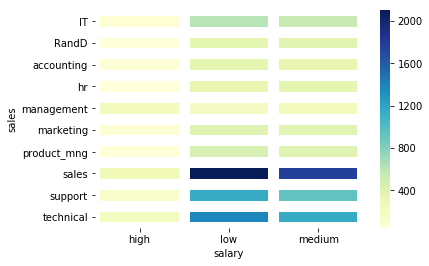

In [18]:
sns.heatmap(people_salary_department_pivot, linewidths=10, cmap="YlGnBu")

In [19]:
people_salary_department_iplotly = people_salary_department.reset_index()
fig = px.bar(people_salary_department_iplotly, x="sales", y="count_people", color='salary')
fig.show()


**9.Сколько сотрудников покинули компанию.**


In [20]:
left = sum(hr.left)
count_people = sum(hr.count_people)
print(str(left) + " сотрудников покинуло компанию.")
print(str(count_people) + ' сотрудников в компании.')
percent_left = left/count_people*100
print(str( toFixed(percent_left,2)) + ' процентов сотрудников покинуло компанию.')

3571 сотрудников покинуло компанию.
14999 сотрудников в компании.
23.81 процентов сотрудников покинуло компанию.


**10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.**


**Первая гипотеза: сотрудники покидают компанию из за низкой зарплаты**

In [21]:
# Таблица сотрудников с разбивкой по уровню зарплаты
people_salary = hr.filter(items=['salary','count_people']).groupby(by = 'salary').count()
people_salary.rename(columns={'salary': 'salary', 'count_people': 'count_peaople_salary'}, inplace=True)
people_salary

,count_peaople_salary
salary,
high,1237
low,7316
medium,6446


In [22]:
# Таблица покинувших компанию сотрудников с разбивкой по уровню зарплаты
people_salary_left = hr.where(hr.left==1).filter(items=['salary','count_people']).groupby(by = 'salary').count()
people_salary_left.rename(columns={'salary': 'salary', 'count_people': 'count_peaople_salary_left'}, inplace=True)
people_salary_left

,count_peaople_salary_left
salary,
high,82
low,2172
medium,1317


In [89]:
joined = people_salary.merge(people_salary_left, how='inner', on='salary')

In [88]:
# Считаем процент сотрудников покинувших компанию
percent_left_salary = joined['count_peaople_salary_left']/joined['count_peaople_salary']*100

round(percent_left_salary,2)

salary
high       6.63
low       29.69
medium    20.43
dtype: float64

**Вывод:** Как мы видим почти 30% и 20% сотрудников с низким и средним доходом покиают компанию.

**Вторая гипотеза: сотрудники покидают компанию из за низкого уровня удовлетворенности**

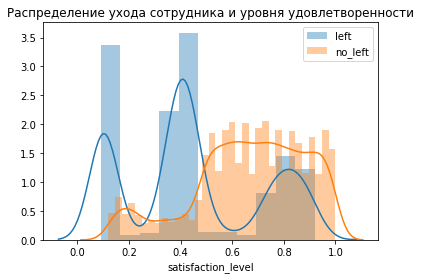

t-критерий: -51.613
p-value:0.000


In [87]:
data_tuple = ('left','no_left','satisfaction_level')
hr1 = hr.loc[hr['left']==1][data_tuple[2]]
hr2 = hr.loc[hr['left']==0][data_tuple[2]]

sns.distplot(hr1)
sns.distplot(hr2)
plt.title('Распределение ухода сотрудника и уровня удовлетворенности')
plt.legend([data_tuple[0],data_tuple[1]])
plt.show()
value = sts.ttest_ind(hr1, hr2)
print(f't-критерий: {value.statistic:.3f}')
print(f'p-value:{value.pvalue:.3f}')

**Третья гипотеза: сотрудники покидают компанию из за переработки по количествам часов**

За месяц должно получаться примерно 160 рабочих часов,поэтому мы определим связь между переработкой и уходом из компании.
Так же имеет смысл проверить на каких проектах происходит переработка по количеству рабочих часов number_project

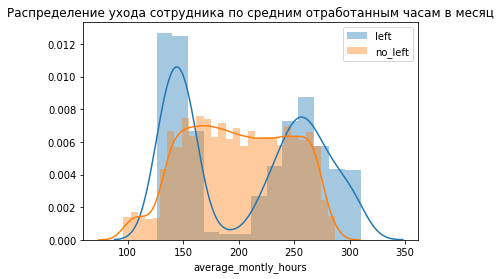

t-критерий: 8.752
p-value:0.000


In [86]:
data_tuple = ('left','no_left','average_montly_hours')
hr1 = hr.loc[hr['left']==1][data_tuple[2]]
hr2 = hr.loc[hr['left']==0][data_tuple[2]]

sns.distplot(hr1)
sns.distplot(hr2)
plt.title('Распределение ухода сотрудника по средним отработанным часам в месяц')
plt.legend([data_tuple[0],data_tuple[1]])
plt.show()
value = sts.ttest_ind(hr1, hr2)
print(f't-критерий: {value.statistic:.3f}')
print(f'p-value:{value.pvalue:.3f}')